# Introduction

The New York Police Department, or NYPD, is one of the most active police departments in the US, where they go through many conflicts with criminals throughout the state with a multitude of different crimes ranging from murder, marijuana possession, robbery, arson, etc. Through many instances of arrests in the state, we can see some specific instances of discrimination of specific arrests where the perpetrator can be wrongly accused or wrongly acquitted from their crimes.


This project addresses the following question: Is there evidence of discrimination in NYPD arrests based on demographics?


The approach used will use machine learning algorithms to find insights into how the different variables in the given dataset of NYPD arrests interact with each other. In particular, our approach will use Random Forests to classify arrests based on various predictors.


# Data and Problem Definition

## Data Set

The given dataset contains variables of each arrest such as the age group, gender, precinct (city district), race, and other descriptive factors. In particular, each row contains information about the arrest key, arrest date, internal classification code, description of said code, a more general internal classification code, description of said code, law code charges, level of offense committed, the borough the arrest was made in, precinct where the arrest occurred, jurisdiction responsible for arrest, age group of the perpetrator, sex of the perpetrator, race of the perpetrator, and coordinates of the location of arrest.

In this project, we mainly use the following features: internal classification code, level of offense committed, age group of the perpetrator, sex of the perpetrator, and race of the perpetrator.

## Problem Definition

In this particular approach, the problem is to find bias in classification in favor of or against a certain demographic. 

Our approach will be as follows: Train a model using the data to predict a certain characteristic of the arrest and compare the predictions with the actual labels to see if the predictions are skewed.

# Methodology

## Exploratory Data Analysis

In [20]:
import pandas as pd
nypd = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")

In [21]:
nypd = nypd[['PD_DESC', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_BORO']]
nypd.dropna(inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


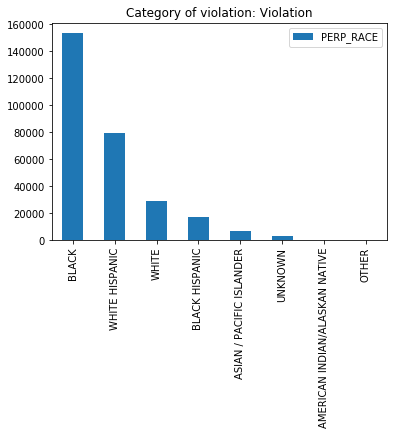

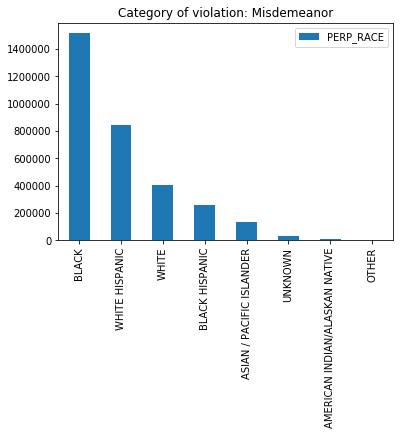

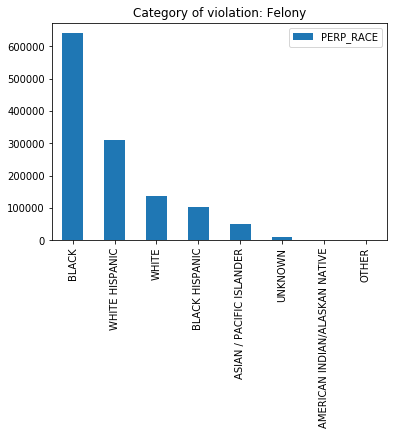

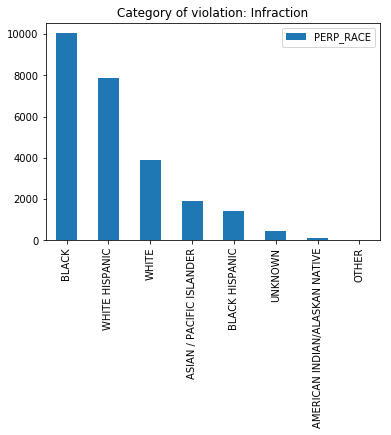

In [22]:
dict = {'V':'Violation', 'F':'Felony', 'M':'Misdemeanor', 'I':'Infraction'}
for i in nypd.LAW_CAT_CD.unique():
    group = nypd[nypd.LAW_CAT_CD == i]
    counts = group.PERP_RACE.value_counts()
    counts = pd.DataFrame(counts)
    title = "Category of violation: " + dict[i]
    print(counts.plot(kind='bar', title = title))

Using clustering, we get the following output:

Standardized Cluster Means:
centroid    pd_desc                               perp_race       age_group    arrest_boro    perp_sex    law_cat_cd
----------  ------------------------------------  --------------  -----------  -------------  ----------  ------------
1           ASSAULT 3                             BLACK           25-44        Q              M           M
2           THEFT OF SERVICES, UNCLASSIFIED       BLACK           18-24        M              M           M
3           CONTROLLED SUBSTANCE, POSSESSION 7    WHITE HISPANIC  25-44        K              M           M
4           CONTROLLED SUBSTANCE,SALE 3           WHITE HISPANIC  25-44        M              M           F
5           NY STATE LAWS,UNCLASSIFIED VIOLATION  BLACK           25-44        M              M           V
6           ASSAULT 2,1,UNCLASSIFIED              WHITE HISPANIC  25-44        B              F           F

Centroid Statistics:
    centroid    size         within_cluster_sum_of_squares
--  ----------  -----------  -------------------------------
    1           2.03914e+06  5.26579e+06
    2           1.17129e+06  2.77919e+06
    3           722192       1.5601e+06
    4           416880       969848
    5           235334       393414
    6           213506       546798

## Modeling

We start by using a Naive Bayes Classifier to predict the race of the perpetrator using their age group, sex, category of offense, and description of offense. Even though this is counter intuitive, we are trying to uncover a pattern that the model could learn about the race of the perpetrator in specific arrest scenarios.

In [32]:
from sklearn.model_selection import train_test_split
import h2o
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

h2o.init(max_mem_size = "10G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all()


data=nypd[['PD_DESC', 'AGE_GROUP', 'PERP_SEX', 'LAW_CAT_CD','PERP_RACE']]

predictors = data.columns.values[:-1]
target = data.columns.values[-1]


train, test = train_test_split(nypd, test_size=0.3)

h_train = h2o.H2OFrame(train)
h_test = h2o.H2OFrame(test)

model = H2ONaiveBayesEstimator(score_each_iteration=True,
                               seed = 1234)
model.train(training_frame = h_train,
            validation_frame = h_test,
            y = str(target),
            x = list(predictors))
print(model)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,25 mins 51 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_varch_j63zsy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.97 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
naivebayes Model Build progress: |████████████████████████████████████████| 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1586062955647_1


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,8.0,0.000284,0.485656




ModelMetricsMultinomial: naivebayes
** Reported on train data. **

MSE: 0.4683722936647309
RMSE: 0.684377303586794
LogLoss: 1.3171315620859425
Mean Per-Class Error: 0.8687579092919805

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,OTHER,UNKNOWN,WHITE,WHITE HISPANIC,Error,Rate
0,0.0,14.0,6884.0,2.0,0.0,2.0,75.0,380.0,1.000000,"7,357 / 7,357"
1,2.0,724.0,122904.0,30.0,0.0,63.0,1776.0,9264.0,0.994628,"134,039 / 134,763"
2,2.0,502.0,1588126.0,110.0,0.0,283.0,6639.0,27147.0,0.021372,"34,683 / 1,622,809"
3,0.0,200.0,256613.0,0.0,0.0,73.0,1378.0,9221.0,1.000000,"267,485 / 267,485"
4,0.0,1.0,907.0,0.0,0.0,0.0,5.0,35.0,1.000000,948 / 948
5,1.0,60.0,31237.0,7.0,0.0,0.0,485.0,2301.0,1.000000,"34,091 / 34,091"
6,3.0,364.0,373104.0,108.0,0.0,165.0,7767.0,21939.0,0.980749,"395,683 / 403,450"
7,1.0,663.0,822796.0,75.0,0.0,236.0,6164.0,40643.0,0.953315,"829,935 / 870,578"
8,9.0,2528.0,3202571.0,332.0,0.0,822.0,24289.0,110930.0,0.510020,"1,704,221 / 3,341,481"



Top-8 Hit Ratios: 


,k,hit_ratio
0,1,0.489980
1,2,0.746147
2,3,0.877586
3,4,0.951860
4,5,0.987473
5,6,0.997393
6,7,0.999696
7,8,1.000000



ModelMetricsMultinomial: naivebayes
** Reported on validation data. **

MSE: 0.46793905490871296
RMSE: 0.6840607099583436
LogLoss: 1.3156647265511612
Mean Per-Class Error: 0.8687512321177057

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,OTHER,UNKNOWN,WHITE,WHITE HISPANIC,Error,Rate
0,0.0,4.0,2853.0,0.0,0.0,1.0,36.0,178.0,1.000000,"3,072 / 3,072"
1,0.0,313.0,52359.0,7.0,0.0,25.0,785.0,3960.0,0.994552,"57,136 / 57,449"
2,3.0,196.0,681506.0,39.0,0.0,133.0,2900.0,11692.0,0.021484,"14,963 / 696,469"
3,0.0,71.0,109710.0,7.0,0.0,32.0,575.0,4021.0,0.999939,"114,409 / 114,416"
4,0.0,1.0,389.0,0.0,0.0,0.0,1.0,24.0,1.000000,415 / 415
5,0.0,24.0,13433.0,2.0,0.0,5.0,197.0,973.0,0.999658,"14,629 / 14,634"
6,1.0,153.0,160004.0,40.0,0.0,83.0,3218.0,9171.0,0.981363,"169,452 / 172,670"
7,0.0,253.0,352407.0,30.0,0.0,90.0,2635.0,17523.0,0.953014,"355,415 / 372,938"
8,4.0,1015.0,1372661.0,125.0,0.0,369.0,10347.0,47542.0,0.509399,"729,491 / 1,432,063"



Top-8 Hit Ratios: 


,k,hit_ratio
0,1,0.490601
1,2,0.746526
2,3,0.878012
3,4,0.952205
4,5,0.987490
5,6,0.997445
6,7,0.999695
7,8,1.000000


Judging the model performance, we conclude that there is no clear pattern in the data with respect to race.

Next, we train a Naive Bayes Classifier on all demographic categorical variables to predict the level of offense.

In [35]:
h2o.init(max_mem_size = "10G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all()


data=nypd[['AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'LAW_CAT_CD']]

predictors = data.columns.values[:-1]
target = data.columns.values[-1]


train, test = train_test_split(nypd, test_size=0.3)

h_train = h2o.H2OFrame(train)
h_test = h2o.H2OFrame(test)

model = H2ONaiveBayesEstimator(score_each_iteration=True,
                               seed = 1234)
model.train(training_frame = h_train,
            validation_frame = h_test,
            y = str(target),
            x = list(predictors))
print(model)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,51 mins 56 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_varch_j63zsy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.97 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
naivebayes Model Build progress: |████████████████████████████████████████| 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1586062955647_3


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,4.0,0.005317,0.671163




ModelMetricsMultinomial: naivebayes
** Reported on train data. **

MSE: 0.27267301688953166
RMSE: 0.5221810192735195
LogLoss: 0.8098425328356452
Mean Per-Class Error: 0.750008137592646

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,0.0,5.0,878035.0,15.0,1.000000,"878,055 / 878,055"
1,1.0,0.0,17767.0,0.0,1.000000,"17,768 / 17,768"
2,45.0,3.0,2242605.0,25.0,0.000033,"73 / 2,242,678"
3,2.0,1.0,202974.0,0.0,1.000000,"202,977 / 202,977"
4,48.0,9.0,3341381.0,40.0,0.328858,"1,098,873 / 3,341,478"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.671142
1,2,0.933906
2,3,0.994660
3,4,1.000000



ModelMetricsMultinomial: naivebayes
** Reported on validation data. **

MSE: 0.2724527333255598
RMSE: 0.5219700502189372
LogLoss: 0.8097145524908334
Mean Per-Class Error: 0.7500033540457705

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,0.0,0.0,375656.0,2.0,1.000000,"375,658 / 375,658"
1,0.0,0.0,7875.0,0.0,1.000000,"7,875 / 7,875"
2,13.0,3.0,961820.0,8.0,0.000025,"24 / 961,844"
3,0.0,1.0,86684.0,1.0,0.999988,"86,685 / 86,686"
4,13.0,4.0,1432035.0,11.0,0.328367,"470,242 / 1,432,063"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.671633
1,2,0.933949
2,3,0.994491
3,4,1.000000


From the results, we notice that the model classifies almost all instances as misdemeanors, indicating that it is simply favoring the most frequent level rather than exposing any structure within the data. This leads us to the conclusion that demographic variables do not accurately model the level of offense.

### Random Forest

We now use a more sophisticated non-parametric model to use a selection of variables to predict the the level of offense. In this, we use a methodology of hiding the borough variable from the model after subsetting the data to a specific borough. Effectively, this results in implicitly borough-specific model. We then proceed to test each model agains data from different boroughs to check if there is a bias in the predictions of the levels of offense in any model against any different borough

In [37]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

boroughs = nypd['ARREST_BORO'].unique()

nypd = nypd[['PD_DESC', 'PERP_RACE', 'AGE_GROUP', 'ARREST_BORO', 'PERP_SEX', 'LAW_CAT_CD']]

for borough in boroughs:
    df_borough = nypd.loc[nypd['ARREST_BORO'] == borough]
    df_borough.drop(['ARREST_BORO'], axis=1, inplace=True)

    train, test = train_test_split(df_borough, test_size=0.2)

    predictors = train.columns.values[:-1]
    target = train.columns.values[-1]

    model = H2ORandomForestEstimator(
        model_id="rf_"+borough,
        ntrees=200,
        stopping_rounds=7,
        score_each_iteration=True,
        max_depth=50,
        seed=1000000)

    h_train = h2o.H2OFrame(train)
    h_test = h2o.H2OFrame(test)

    model.train(list(predictors), str(target), training_frame=h_train, validation_frame=h_test)
    print(model)

    h2o.save_model(model=model, path="rf_"+borough, force=True)
    print(model.score_history())

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_Q


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,27.0,108.0,386750.0,8.0,16.0,12.148149,28.0,298.0,133.24074




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.013171771670983146
RMSE: 0.11476833914883994
LogLoss: 0.05353537307174825
Mean Per-Class Error: 0.14278233045171151

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,192838.0,0.0,4514.0,0.0,0.022873,"4,514 / 197,352"
1,0.0,4411.0,5176.0,143.0,0.546660,"5,319 / 9,730"
2,531.0,17.0,457625.0,0.0,0.001196,"548 / 458,173"
3,0.0,0.0,19.0,47408.0,0.000401,"19 / 47,427"
4,193369.0,4428.0,467334.0,47551.0,0.014593,"10,400 / 712,682"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.985407
1,2,0.999572
2,3,0.999990
3,4,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.013276702073372752
RMSE: 0.11522457235057439
LogLoss: 0.0543130314762207
Mean Per-Class Error: 0.13920517395963944

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,48443.0,0.0,1199.0,0.0,0.024153,"1,199 / 49,642"
1,0.0,1174.0,1287.0,42.0,0.530963,"1,329 / 2,503"
2,130.0,7.0,113998.0,0.0,0.001200,"137 / 114,135"
3,0.0,0.0,6.0,11885.0,0.000505,"6 / 11,891"
4,48573.0,1181.0,116490.0,11927.0,0.014991,"2,671 / 178,171"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.985009
1,2,0.999506
2,3,0.999977
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-04-04 23:04:49,0.112 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-04 23:04:53,3.980 sec,1.0,0.163007,0.124956,0.015037,0.163222,0.125809,0.015210
2,,2020-04-04 23:04:56,6.781 sec,2.0,0.138292,0.088431,0.014741,0.132450,0.083278,0.015008
3,,2020-04-04 23:04:58,8.925 sec,3.0,0.129223,0.075707,0.014691,0.123747,0.070831,0.014991
4,,2020-04-04 23:05:00,10.854 sec,4.0,0.124490,0.068961,0.014758,0.120153,0.064559,0.014980
5,,2020-04-04 23:05:02,12.713 sec,5.0,0.121484,0.063396,0.014701,0.118261,0.060747,0.014986
6,,2020-04-04 23:05:04,15.035 sec,6.0,0.119587,0.060611,0.014688,0.117189,0.058372,0.014963
7,,2020-04-04 23:05:06,17.313 sec,7.0,0.118227,0.058778,0.014663,0.116513,0.056646,0.014980
8,,2020-04-04 23:05:09,19.574 sec,8.0,0.117259,0.057572,0.014613,0.116110,0.056152,0.014963
9,,2020-04-04 23:05:11,21.875 sec,9.0,0.116538,0.055820,0.014637,0.115756,0.055038,0.014986



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PD_DESC,6.984099e+06,1.000000,0.995673
1,PERP_RACE,1.877215e+04,0.002688,0.002676
2,PERP_SEX,7.393794e+03,0.001059,0.001054
3,AGE_GROUP,4.187105e+03,0.000600,0.000597



                timestamp           duration  number_of_trees  training_rmse  \
0     2020-04-04 23:04:49          0.112 sec              0.0            NaN   
1     2020-04-04 23:04:53          3.980 sec              1.0       0.163007   
2     2020-04-04 23:04:56          6.781 sec              2.0       0.138292   
3     2020-04-04 23:04:58          8.925 sec              3.0       0.129223   
4     2020-04-04 23:05:00         10.854 sec              4.0       0.124490   
5     2020-04-04 23:05:02         12.713 sec              5.0       0.121484   
6     2020-04-04 23:05:04         15.035 sec              6.0       0.119587   
7     2020-04-04 23:05:06         17.313 sec              7.0       0.118227   
8     2020-04-04 23:05:09         19.574 sec              8.0       0.117259   
9     2020-04-04 23:05:11         21.875 sec              9.0       0.116538   
10    2020-04-04 23:05:13         24.394 sec             10.0       0.115940   
11    2020-04-04 23:05:16         26.95

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,18.0,72.0,253844.0,8.0,17.0,12.222222,19.0,301.0,135.45833




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.007878494355481895
RMSE: 0.08876088302558675
LogLoss: 0.03252895137395644
Mean Per-Class Error: 0.14416619061137875

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,301102.0,0.0,4935.0,0.0,0.016126,"4,935 / 306,037"
1,0.0,2613.0,2960.0,324.0,0.556893,"3,284 / 5,897"
2,926.0,16.0,671086.0,0.0,0.001402,"942 / 672,028"
3,0.0,2.0,180.0,80916.0,0.002244,"182 / 81,098"
4,302028.0,2631.0,679161.0,81240.0,0.008772,"9,343 / 1,065,060"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.991228
1,2,0.999744
2,3,0.999992
3,4,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.0075037751187233
RMSE: 0.08662433329453854
LogLoss: 0.03159136187403362
Mean Per-Class Error: 0.14318723460345475

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,74772.0,0.0,1189.0,0.0,0.015653,"1,189 / 75,961"
1,0.0,629.0,710.0,71.0,0.553901,"781 / 1,410"
2,266.0,2.0,168119.0,0.0,0.001592,"268 / 168,387"
3,0.0,1.0,32.0,20542.0,0.001604,"33 / 20,575"
4,75038.0,632.0,170050.0,20613.0,0.008527,"2,271 / 266,333"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.991473
1,2,0.999748
2,3,0.999989
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-04-04 23:07:10,0.018 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-04 23:07:12,2.050 sec,1.0,0.103695,0.051007,0.008943,0.102997,0.049310,0.008794
2,,2020-04-04 23:07:14,3.844 sec,2.0,0.095218,0.040597,0.008827,0.092417,0.035531,0.008613
3,,2020-04-04 23:07:16,6.100 sec,3.0,0.092595,0.036993,0.008882,0.089348,0.032043,0.008598
4,,2020-04-04 23:07:18,8.430 sec,4.0,0.091148,0.035597,0.008855,0.088099,0.031082,0.008591
5,,2020-04-04 23:07:21,10.810 sec,5.0,0.090288,0.034112,0.008850,0.087375,0.030484,0.008523
6,,2020-04-04 23:07:24,13.550 sec,6.0,0.089748,0.033708,0.008828,0.087004,0.030347,0.008512
7,,2020-04-04 23:07:26,16.278 sec,7.0,0.089364,0.033000,0.008837,0.086788,0.030338,0.008523
8,,2020-04-04 23:07:29,19.189 sec,8.0,0.089033,0.032466,0.008828,0.086622,0.030145,0.008516
9,,2020-04-04 23:07:32,22.120 sec,9.0,0.088683,0.031747,0.008813,0.086492,0.029882,0.008523



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PD_DESC,7.348236e+06,1.000000,0.997538
1,PERP_SEX,8.802860e+03,0.001198,0.001195
2,AGE_GROUP,5.206346e+03,0.000709,0.000707
3,PERP_RACE,4.124638e+03,0.000561,0.000560



                timestamp    duration  number_of_trees  training_rmse  \
0     2020-04-04 23:07:10   0.018 sec              0.0            NaN   
1     2020-04-04 23:07:12   2.050 sec              1.0       0.103695   
2     2020-04-04 23:07:14   3.844 sec              2.0       0.095218   
3     2020-04-04 23:07:16   6.100 sec              3.0       0.092595   
4     2020-04-04 23:07:18   8.430 sec              4.0       0.091148   
5     2020-04-04 23:07:21  10.810 sec              5.0       0.090288   
6     2020-04-04 23:07:24  13.550 sec              6.0       0.089748   
7     2020-04-04 23:07:26  16.278 sec              7.0       0.089364   
8     2020-04-04 23:07:29  19.189 sec              8.0       0.089033   
9     2020-04-04 23:07:32  22.120 sec              9.0       0.088683   
10    2020-04-04 23:07:35  25.293 sec             10.0       0.088459   
11    2020-04-04 23:07:39  28.614 sec             11.0       0.088302   
12    2020-04-04 23:07:42  32.331 sec             

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,21.0,84.0,313167.0,8.0,15.0,12.059524,23.0,274.0,133.40475




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.005186149758704385
RMSE: 0.07201492733249396
LogLoss: 0.027993786119493488
Mean Per-Class Error: 0.09385858053836384

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,234508.0,1.0,3484.0,0.0,0.014643,"3,485 / 237,993"
1,0.0,2124.0,881.0,313.0,0.359855,"1,194 / 3,318"
2,313.0,110.0,707462.0,0.0,0.000598,"423 / 707,885"
3,0.0,0.0,29.0,85733.0,0.000338,"29 / 85,762"
4,234821.0,2235.0,711856.0,86046.0,0.004958,"5,131 / 1,034,958"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.995042
1,2,0.999844
2,3,0.999993
3,4,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.004743203790480386
RMSE: 0.06887092122572766
LogLoss: 0.028013911209936484
Mean Per-Class Error: 0.09571930927064987

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,58688.0,0.0,901.0,0.0,0.015120,"901 / 59,589"
1,0.0,478.0,214.0,63.0,0.366887,277 / 755
2,67.0,29.0,176930.0,0.0,0.000542,"96 / 177,026"
3,0.0,0.0,7.0,21381.0,0.000327,"7 / 21,388"
4,58755.0,507.0,178052.0,21444.0,0.004951,"1,281 / 258,758"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.995049
1,2,0.999729
2,3,0.999969
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-04-04 23:08:58,0.022 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-04 23:09:00,2.374 sec,1.0,0.166039,0.108808,0.005319,0.166620,0.113532,0.005318
2,,2020-04-04 23:09:02,4.413 sec,2.0,0.123979,0.065191,0.005108,0.115016,0.065646,0.005005
3,,2020-04-04 23:09:05,6.668 sec,3.0,0.106279,0.050088,0.005063,0.095141,0.050401,0.004970
4,,2020-04-04 23:09:07,8.808 sec,4.0,0.095911,0.043323,0.005048,0.085312,0.042527,0.004966
5,,2020-04-04 23:09:09,11.122 sec,5.0,0.089497,0.038516,0.005017,0.079697,0.037757,0.004954
6,,2020-04-04 23:09:12,13.929 sec,6.0,0.085209,0.035525,0.005021,0.076265,0.034504,0.004947
7,,2020-04-04 23:09:15,16.881 sec,7.0,0.082022,0.033542,0.005008,0.074058,0.032223,0.004947
8,,2020-04-04 23:09:19,20.597 sec,8.0,0.079456,0.031699,0.004989,0.072515,0.030603,0.004943
9,,2020-04-04 23:09:22,23.562 sec,9.0,0.077304,0.029933,0.004977,0.071375,0.029191,0.004947



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PD_DESC,7.800080e+06,1.000000,0.997014
1,PERP_SEX,1.110029e+04,0.001423,0.001419
2,PERP_RACE,8.960558e+03,0.001149,0.001145
3,AGE_GROUP,3.299111e+03,0.000423,0.000422



                timestamp           duration  number_of_trees  training_rmse  \
0     2020-04-04 23:08:58          0.022 sec              0.0            NaN   
1     2020-04-04 23:09:00          2.374 sec              1.0       0.166039   
2     2020-04-04 23:09:02          4.413 sec              2.0       0.123979   
3     2020-04-04 23:09:05          6.668 sec              3.0       0.106279   
4     2020-04-04 23:09:07          8.808 sec              4.0       0.095911   
5     2020-04-04 23:09:09         11.122 sec              5.0       0.089497   
6     2020-04-04 23:09:12         13.929 sec              6.0       0.085209   
7     2020-04-04 23:09:15         16.881 sec              7.0       0.082022   
8     2020-04-04 23:09:19         20.597 sec              8.0       0.079456   
9     2020-04-04 23:09:22         23.562 sec              9.0       0.077304   
10    2020-04-04 23:09:25         27.262 sec             10.0       0.075789   
11    2020-04-04 23:09:29         31.19

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,72.0,288.0,559503.0,4.0,16.0,11.017361,7.0,176.0,77.21875




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.007346465050413919
RMSE: 0.08571152227334385
LogLoss: 0.0384756856978329
Mean Per-Class Error: 0.10515733899416524

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,38371.0,0.0,766.0,0.0,0.019572,"766 / 39,137"
1,3.0,260.0,154.0,8.0,0.388235,165 / 425
2,112.0,8.0,92113.0,0.0,0.001301,"120 / 92,233"
3,4.0,0.0,6.0,858.0,0.011521,10 / 868
4,38490.0,268.0,93039.0,866.0,0.007998,"1,061 / 132,663"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.992002
1,2,0.999812
2,3,0.999955
3,4,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.007450859906088194
RMSE: 0.08631836366665087
LogLoss: 0.03921656968285433
Mean Per-Class Error: 0.14390466445553032

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,9516.0,0.0,191.0,0.0,0.019677,"191 / 9,707"
1,0.0,45.0,51.0,4.0,0.550000,55 / 100
2,16.0,1.0,23150.0,0.0,0.000734,"17 / 23,167"
3,1.0,0.0,0.0,191.0,0.005208,1 / 192
4,9533.0,46.0,23392.0,195.0,0.007960,"264 / 33,166"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.992040
1,2,0.999879
2,3,0.999940
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-04-04 23:10:55,0.056 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-04 23:10:55,0.296 sec,1.0,0.226961,0.219991,0.047796,0.227545,0.223925,0.049056
2,,2020-04-04 23:10:56,0.561 sec,2.0,0.165825,0.130328,0.023896,0.142502,0.110307,0.008382
3,,2020-04-04 23:10:56,0.849 sec,3.0,0.140145,0.102013,0.016387,0.116691,0.084242,0.008231
4,,2020-04-04 23:10:56,1.282 sec,4.0,0.125124,0.089853,0.012812,0.105161,0.069287,0.008201
5,,2020-04-04 23:10:57,1.796 sec,5.0,0.114856,0.074680,0.010814,0.098635,0.058296,0.008171
6,,2020-04-04 23:10:58,2.497 sec,6.0,0.108226,0.065567,0.009814,0.095051,0.054095,0.008171
7,,2020-04-04 23:10:58,3.192 sec,7.0,0.104147,0.062841,0.009299,0.092862,0.050323,0.008171
8,,2020-04-04 23:10:59,3.829 sec,8.0,0.100035,0.056350,0.008776,0.091060,0.047905,0.008141
9,,2020-04-04 23:11:00,4.449 sec,9.0,0.096980,0.051707,0.008500,0.089832,0.044297,0.008141



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PD_DESC,3.048465e+06,1.000000,0.996221
1,PERP_RACE,7.735905e+03,0.002538,0.002528
2,PERP_SEX,2.010547e+03,0.000660,0.000657
3,AGE_GROUP,1.817694e+03,0.000596,0.000594



                 timestamp           duration  number_of_trees  training_rmse  \
0      2020-04-04 23:10:55          0.056 sec              0.0            NaN   
1      2020-04-04 23:10:55          0.296 sec              1.0       0.226961   
2      2020-04-04 23:10:56          0.561 sec              2.0       0.165825   
3      2020-04-04 23:10:56          0.849 sec              3.0       0.140145   
4      2020-04-04 23:10:56          1.282 sec              4.0       0.125124   
5      2020-04-04 23:10:57          1.796 sec              5.0       0.114856   
6      2020-04-04 23:10:58          2.497 sec              6.0       0.108226   
7      2020-04-04 23:10:58          3.192 sec              7.0       0.104147   
8      2020-04-04 23:10:59          3.829 sec              8.0       0.100035   
9      2020-04-04 23:11:00          4.449 sec              9.0       0.096980   
10     2020-04-04 23:11:00          5.151 sec             10.0       0.094922   
11     2020-04-04 23:11:01 

[73 rows x 10 columns]
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_B


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,18.0,72.0,225684.0,6.0,16.0,11.444445,18.0,281.0,114.388885




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.004301819027950368
RMSE: 0.06558825373457025
LogLoss: 0.01762195615523751
Mean Per-Class Error: 0.0763673557544016

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,218978.0,0.0,3555.0,0.0,0.015975,"3,555 / 222,533"
1,0.0,855.0,283.0,61.0,0.286906,"344 / 1,199"
2,280.0,36.0,632586.0,0.0,0.000499,"316 / 632,902"
3,0.0,1.0,33.0,16240.0,0.002089,"34 / 16,274"
4,219258.0,892.0,636457.0,16301.0,0.004868,"4,249 / 872,908"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.995132
1,2,0.999968
2,3,0.999992
3,4,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.004327694745189184
RMSE: 0.0657852167678209
LogLoss: 0.017743214393310787
Mean Per-Class Error: 0.08434717159805417

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,54689.0,0.0,909.0,0.0,0.016350,"909 / 55,598"
1,0.0,207.0,84.0,13.0,0.319079,97 / 304
2,72.0,10.0,158137.0,0.0,0.000518,"82 / 158,219"
3,0.0,1.0,5.0,4155.0,0.001442,"6 / 4,161"
4,54761.0,218.0,159135.0,4168.0,0.005012,"1,094 / 218,282"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.994988
1,2,0.999973
2,3,0.999995
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-04-04 23:14:10,0.032 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-04 23:14:12,1.663 sec,1.0,0.067871,0.028939,0.005201,0.068914,0.031050,0.005388
2,,2020-04-04 23:14:14,3.524 sec,2.0,0.066201,0.022993,0.005039,0.066048,0.019038,0.005117
3,,2020-04-04 23:14:16,5.655 sec,3.0,0.065632,0.020637,0.004975,0.065604,0.016551,0.005044
4,,2020-04-04 23:14:18,7.584 sec,4.0,0.065524,0.019811,0.004963,0.065573,0.016561,0.005053
5,,2020-04-04 23:14:20,9.667 sec,5.0,0.065255,0.018931,0.004939,0.065458,0.016279,0.005021
6,,2020-04-04 23:14:22,11.958 sec,6.0,0.065056,0.018174,0.004911,0.065472,0.016074,0.005021
7,,2020-04-04 23:14:24,14.322 sec,7.0,0.065896,0.018541,0.004902,0.065921,0.016771,0.005016
8,,2020-04-04 23:14:27,17.144 sec,8.0,0.065649,0.018006,0.004895,0.065786,0.016735,0.005012
9,,2020-04-04 23:14:30,19.809 sec,9.0,0.065457,0.017551,0.004886,0.065689,0.016599,0.004998



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PD_DESC,4.853892e+06,1.000000,0.998627
1,PERP_SEX,2.881350e+03,0.000594,0.000593
2,AGE_GROUP,2.620734e+03,0.000540,0.000539
3,PERP_RACE,1.169469e+03,0.000241,0.000241



                timestamp    duration  number_of_trees  training_rmse  \
0     2020-04-04 23:14:10   0.032 sec              0.0            NaN   
1     2020-04-04 23:14:12   1.663 sec              1.0       0.067871   
2     2020-04-04 23:14:14   3.524 sec              2.0       0.066201   
3     2020-04-04 23:14:16   5.655 sec              3.0       0.065632   
4     2020-04-04 23:14:18   7.584 sec              4.0       0.065524   
5     2020-04-04 23:14:20   9.667 sec              5.0       0.065255   
6     2020-04-04 23:14:22  11.958 sec              6.0       0.065056   
7     2020-04-04 23:14:24  14.322 sec              7.0       0.065896   
8     2020-04-04 23:14:27  17.144 sec              8.0       0.065649   
9     2020-04-04 23:14:30  19.809 sec              9.0       0.065457   
10    2020-04-04 23:14:33  22.789 sec             10.0       0.065246   
11    2020-04-04 23:14:36  25.878 sec             11.0       0.065151   
12    2020-04-04 23:14:39  29.337 sec             

Here, we notice a relatively accurate model with an overall error of a mere 1.4593%, but a significant error in the prediction of Infractions.

Note that when we included the law code as a predictor (not shown in report), this error of infractions was also eliminated in a random forest model, result in a negligibly small error on all classifications. The following was the output obtained:

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

Model Details
=============
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_covType_v1


Model Summary:
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    51                 204                         533899                 4            18           11.5882       7             237           80.7157


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0001734852476826297
RMSE: 0.013171379870105854
LogLoss: 0.003255583616165607
Mean Per-Class Error: 0.00033000525330283565

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
F       I     M            V       Error        Rate
------  ----  -----------  ------  -----------  --------------
513090  0     28           0       5.45683e-05  28 / 513,118
0       7954  8            2       0.00125565   10 / 7,964
1       1     1.21166e+06  0       1.65062e-06  2 / 1,211,665
1       0     0            122674  8.15162e-06  1 / 122,675
513092  7955  1.2117e+06   122676  2.20974e-05  41 / 1,855,422

Top-4 Hit Ratios:
k    hit_ratio
---  -----------
1    0.999978
2    0.999999
3    1
4    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.00016996249120756354
RMSE: 0.013036966334525972
LogLoss: 0.0035461151687810766
Mean Per-Class Error: 0.0017149228257738725

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
F       I     M       V      Error        Rate
------  ----  ------  -----  -----------  ------------
127951  0     14      0      0.000109405  14 / 127,965
0       2061  14      0      0.00674699   14 / 2,075
0       1     303173  0      3.29844e-06  1 / 303,174
0       0     0       30642  0            0 / 30,642
127951  2062  303201  30642  6.25194e-05  29 / 463,856

Top-4 Hit Ratios:
k    hit_ratio
---  -----------
1    0.999938
2    0.999963
3    0.999998
4    1

Variable Importances:
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  ------------
PD_DESC      3.08297e+07            1                    0.853075
LAW_CODE     5.21138e+06            0.169038             0.144202
ARREST_BORO  50738.3                0.00164576           0.00140396
AGE_GROUP    27099.1                0.000878995          0.000749848
PERP_SEX     20594.9                0.00066802           0.000569871

Finally, we test the model trained on the Bronx borough (notorious for being relatively unsafe) against the data for the Manhattan borough (the most prestigious borough). If there were a bias, we would expect to see a lot of misclassifications, skewed towards more serious levels of offenses like Felony or Violation as opposed to Infraction or Misdemeanor.

In [53]:
saved_model = h2o.load_model("C:/Users/varch/Desktop/Github/NYPD-Data-Comp/rf_B/rf_B")

In [54]:
testingset = h2o.H2OFrame(nypd.loc[nypd['ARREST_BORO'] == 'M'])
saved_model.model_performance(testingset)

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0048710613504178765
RMSE: 0.06979298926409354
LogLoss: 0.023246667485524727
Mean Per-Class Error: 0.10366541412714929

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,F,I,M,V,Error,Rate
0,293200.0,0.0,4404.0,0.0,0.014798,"4,404 / 297,604"
1,0.0,2458.0,1243.0,372.0,0.396514,"1,615 / 4,073"
2,387.0,75.0,884499.0,0.0,0.000522,"462 / 884,961"
3,0.0,180.0,123.0,106848.0,0.002828,"303 / 107,151"
4,293587.0,2713.0,890269.0,107220.0,0.005244,"6,784 / 1,293,789"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.994756
1,2,0.999790
2,3,0.999930
3,4,1.000000


However, we still get great predictions with an overall error rate of just 0.5244%

# Conclusions

From all of our modeling and data exploration, we can conclude that the data does not represent discrimination on the basis of ethnographic variables. We reconcile this notion with the understanding that the data set is simply unable to capture the instances where discrimination occurs. Our recommendation for an accurate analysis of discrimination is to additionally capture two sets of occurences - before and after the arrests:

1. The stopping point before an arrest is actually made on the suspicion of illegal activity (arbitrary profiling)
2. The varying harshness of judgements given to individuals having committed the same crime but belonging to different demographics

Data representing these factors, when incorporated into our existing random forest model, is very likely to discern any patterns of discrimination present, considering the extreme accuracy with which our model currently provides predictions based on the provided data.